## IDS Logs Dataset

In [ ]:
import pandas as pd
# TODO: use polars to handle dataframe in a more efficient way

data = pd.read_csv('MC2-CSVFirewallandIDSlogs/IDS_global_filtered.csv')

In [ ]:
# read the mapping between the classification number and the classification name
# Store the elements of the first column in a vector
first_col_vector = []
with open('classification_mapping.txt', 'r') as file:
    for line in file:
        name, number = line.strip().split(': ')
        first_col_vector.append(name)
print(first_col_vector)

# now select only the col ' sourceIP' that committed ' Potential Corporate Privacy Violation'
sourceIP_potential_corporate_privacy_violation = data[data[' classification'] == 1][' sourceIP']
print("sourceIP_potential_corporate_privacy_violation: ", len(sourceIP_potential_corporate_privacy_violation))
# get the unique entries and print the length
sourceIP_potential_corporate_privacy_violation_unique = sourceIP_potential_corporate_privacy_violation.unique()
print("sourceIP_potential_corporate_privacy_violation_unique: ", len(sourceIP_potential_corporate_privacy_violation_unique))

# now select only the col ' sourceIP' from the rows where the value of the ' classification' column is ' Attempted Information Leak'
sourceIP_attempted_information_leak = data[data[' classification'] == 3][' sourceIP']
print("sourceIP_attempted_information_leak: ", len(sourceIP_attempted_information_leak))
# get the unique entries and print the length
sourceIP_attempted_information_leak_unique = sourceIP_attempted_information_leak.unique()
print("sourceIP_attempted_information_leak_unique: ", sourceIP_attempted_information_leak_unique)
# verify if all the ips start with 173 or 172 ..

# get the piority of the packets that are classified as ' Potential Corporate Privacy Violation'
sourceIP_bad_traffic = data[data[' classification'] == 4][' sourceIP']
print("sourceIP_bad_traffic: ", sourceIP_bad_traffic.unique())
# now do the intersection between the two sets ==>  IT IS EMTPY
# intersection = set(sourceIP_potential_corporate_privacy_violation_unique).intersection(set(sourceIP_attempted_information_leak_unique))
# print("intersection: ", len(intersection))

# get packet info of the packets that are classified as ' Potential Corporate Privacy Violation'
packet_info_potential_corporate_privacy_violation = data[data[' classification'] == 1][' packet info']
print("packet_info_potential_corporate_privacy_violation: ", packet_info_potential_corporate_privacy_violation.unique())
# same for those classified as ' Attempted Information Leak'
packet_info_attempted_information_leak = data[data[' classification'] == 3][' packet info']
print("packet_info_attempted_information_leak: ", packet_info_attempted_information_leak.unique())
# same for those classified as ' Bad Traffic'
packet_info_bad_traffic = data[data[' classification'] == 4][' packet info']
print("packet_info_bad_traffic: ", packet_info_bad_traffic.unique())

# aggregate all the sourceIPs that are responsible for the aforementioned suspect activities
suspectIPs = pd.concat([sourceIP_potential_corporate_privacy_violation, sourceIP_attempted_information_leak, sourceIP_bad_traffic])
# keep only the unique entries
suspectIPs = suspectIPs.unique()
print("suspectIPs: ", len(suspectIPs))
## SO FAR, ALL THE IPs RESPONSIBLE FOR BAD AND mischievous ACTIVITY ARE INSIDE THE NETWORK

['Generic Protocol Command Decode', 'Potential Corporate Privacy Violation', 'Misc activity', 'Attempted Information Leak', 'Potentially Bad Traffic']
sourceIP_potential_corporate_privacy_violation:  434
sourceIP_potential_corporate_privacy_violation_unique:  89
sourceIP_attempted_information_leak:  366
sourceIP_attempted_information_leak_unique:  ['172.23.240.156' '172.23.236.8' '172.23.231.69' '172.23.234.58'
 '172.23.232.4']
sourceIP_bad_traffic:  ['172.23.240.156' '172.23.236.8' '172.23.231.69' '172.23.234.58'
 '172.23.232.4']
packet_info_potential_corporate_privacy_violation:  [181]
packet_info_attempted_information_leak:  [181]
packet_info_bad_traffic:  [181]
suspectIPs:  94


Plot a histogram of all the source IPs that are responsible for some sort of suspect activity. They are all internal to the network of the company and specifically workstations of individual workers, so there likely are one or more moles that are either trying to access sensitive information with restricted access, or to exfiltrate data to some external server.

/tmp/ipykernel_57050/2560054789.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sourceIP', y='count', data=activity_counts, palette='viridis')


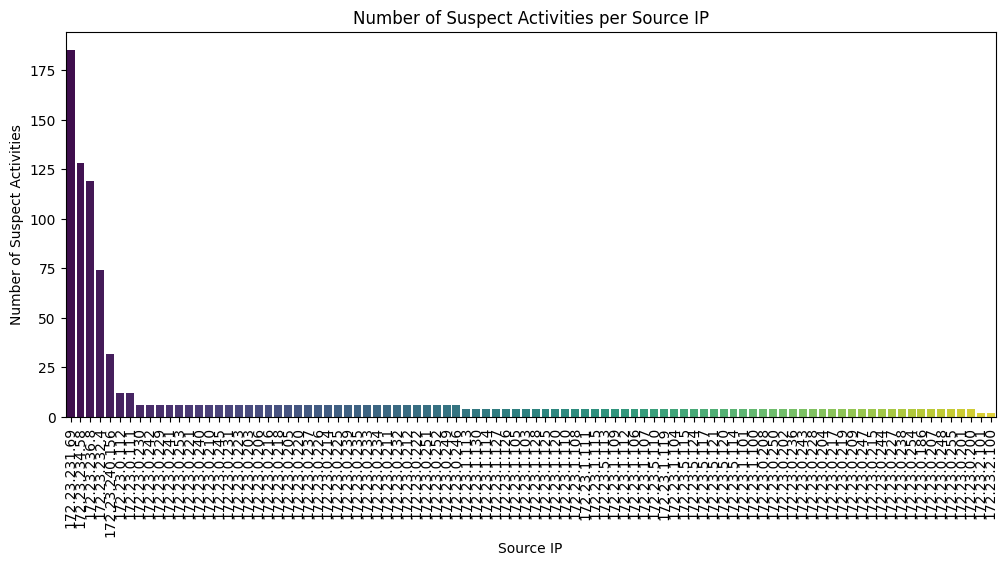

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Filter data for classifications 1, 3, and 4
suspect_activities = data[data[' classification'].isin([1, 3, 4])]

# Count the number of activities per source IP
activity_counts = suspect_activities[' sourceIP'].value_counts().reset_index()
activity_counts.columns = ['sourceIP', 'count']

# Plot the histogram using seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x='sourceIP', y='count', data=activity_counts, palette='viridis')
plt.xlabel('Source IP')
plt.ylabel('Number of Suspect Activities')
plt.title('Number of Suspect Activities per Source IP')
plt.xticks(rotation=90)
plt.show()

## Firewall Logs dataset
Load it once, then perform some analysis to identify information of interest.

In [3]:
# now load the dataset of the firewall logs
data = pd.read_csv('MC2-CSVFirewallandIDSlogs/Firewall_global_filtered.csv')

/tmp/ipykernel_57050/1334131678.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('MC2-CSVFirewallandIDSlogs/Firewall_global_filtered.csv')


In [7]:
# select all the rows corresponding to the suspectIPs
suspect_firewall_logs = data[data['Source IP'].isin(suspectIPs)]

# select all destination IPs
destinationIPs = suspect_firewall_logs['Destination IP'].unique()
print("destinationIPs: ", len(destinationIPs))

destinationIPs:  11


/tmp/ipykernel_57050/3507159206.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Destination IP', y='count', data=destination_ip_counts, palette='viridis')


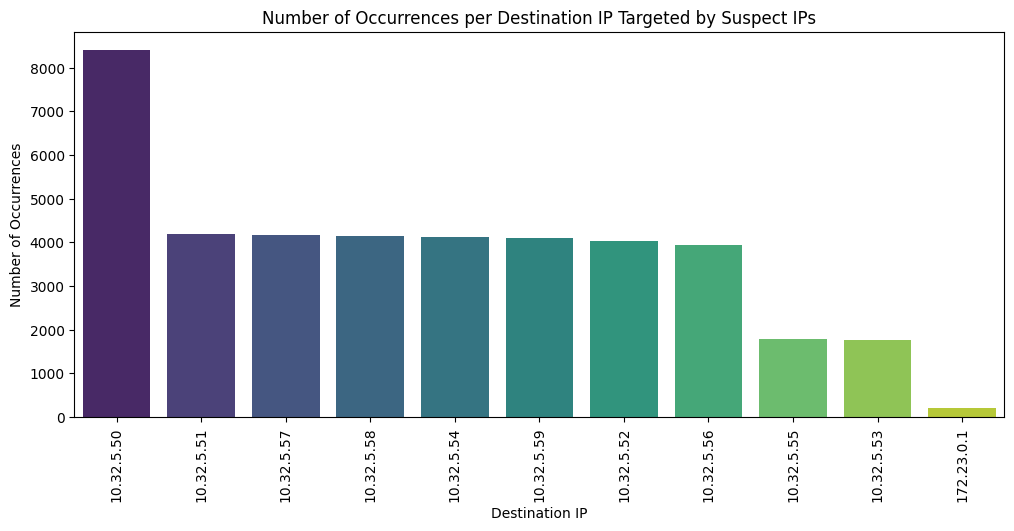

In [5]:
# Count the number of occurrences per destination IP
destination_ip_counts = suspect_firewall_logs['Destination IP'].value_counts().reset_index()
destination_ip_counts.columns = ['Destination IP', 'count']

# Plot the histogram using seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x='Destination IP', y='count', data=destination_ip_counts, palette='viridis')
plt.xlabel('Destination IP')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences per Destination IP Targeted by Suspect IPs')
plt.xticks(rotation=90)
plt.show()

We can notice that the vast majority of the suspect activities is related to access to external websites, which are accessible from the employees. Only a small portion of these accesses are intercepted by the Firewall interface to regional bank network, which has IP 172.23.0.1. 
Moreover, we notice that suspect IPs never contact each other, so it is unlikely that eventual moles are collaborating with each other. Actually, these addresses are not among the destination IPs, so they only have an active role in the network, as one can see below.

In [9]:
# now select all the rows where suspect IPs are the destination IPs
suspect_firewall_logs = data[data['Destination IP'].isin(suspectIPs)]
# lenght
print("suspect_firewall_logs: ", len(suspect_firewall_logs))

suspect_firewall_logs:  0


operations:  [1 5 3 4]


/tmp/ipykernel_57050/125275098.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Operation', data=suspect_firewall_logs, palette='viridis')


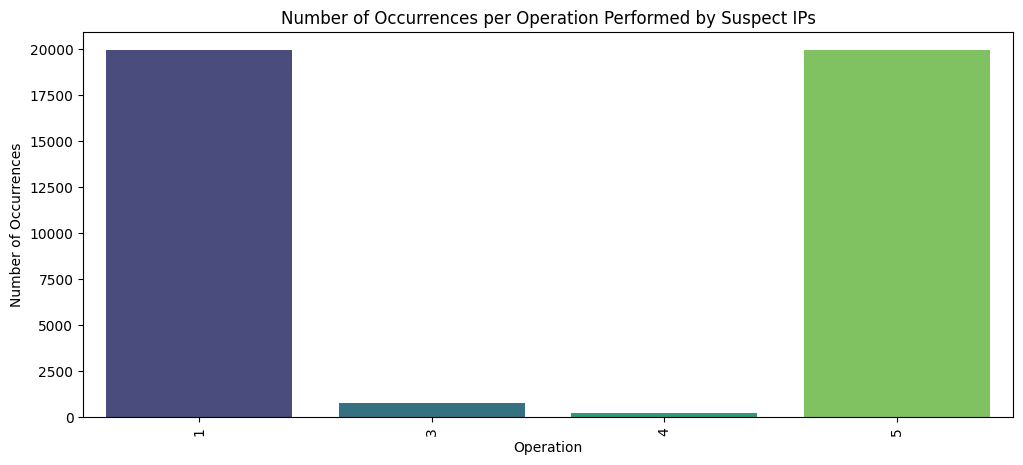

In [18]:
# select the operations that are performed by the suspect IPs
suspect_firewall_logs = data[data['Source IP'].isin(suspectIPs)]
operations = suspect_firewall_logs['Operation'].unique()
print("operations: ", operations)

# plot the histogram of the operations
plt.figure(figsize=(12, 5))
sns.countplot(x='Operation', data=suspect_firewall_logs, palette='viridis')
plt.xlabel('Operation')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences per Operation Performed by Suspect IPs')
plt.xticks(rotation=90)
plt.show()

We can notice that half of the suspect activities has been denied by ACL (Access Control List) rules, which are the first line of defense of the network. It specifies which users have access to which resources, as well as which operations they are allows to perform on a given resource. This means that most of the suspect activities are blocked before they can take affect, so they have not damaged the company. Approximately the other half of the suspect activities have successfully built a connection with an external internet website, and a very small portion have executed a command that had been sent through the network. 